LIMPIEZA DE DATOS PROYECTO BI

Incluir paquetes

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.impute import SimpleImputer

Cargar data

In [89]:
data = pd.read_csv('./Data/NoProcesada/Relacional/clase.csv', sep=';', quotechar='"')

MUESTRA DE DATOS

In [90]:
data.head()

,id_clase,nombre_clase,horario_clase,id_profesor
0,1.0,Eveniet,2025-09-18 13:22:09,377.0
1,2.0,Eaque,NaN,400.0
2,3.0,Quidem,2025-05-28 11:04:39,512.0
3,4.0,Vero,2024-10-23 17:02:45,975.0
4,5.0,Maiores,2024-10-04 06:19:08,435.0


Verificar estructura

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_clase       1999 non-null   float64
 1   nombre_clase   2000 non-null   object 
 2   horario_clase  1803 non-null   object 
 3   id_profesor    1999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 62.6+ KB


Valores nulos

In [92]:
print(f"Nombre columnas {data.columns}")
print(data.isnull().sum())

Nombre columnas Index(['id_clase', 'nombre_clase', 'horario_clase', 'id_profesor'], dtype='object')
id_clase           1
nombre_clase       0
horario_clase    197
id_profesor        1
dtype: int64


In [93]:
data.describe()

,id_clase,id_profesor
count,1999.000000,1999.000000
mean,1000.994497,995.723862
std,577.215399,574.119142
min,1.000000,2.000000
25%,501.500000,495.500000
50%,1001.000000,1010.000000
75%,1500.500000,1478.500000
max,2000.000000,2000.000000


Visualizar el tamaño del dataset

In [94]:
data.shape

(2000, 4)

Cambiar tipos de datos

In [95]:

data['id_clase'] = pd.to_numeric(data['id_clase'], errors='coerce')
data = data.dropna(subset=["id_clase"])

data["id_clase"] = data["id_clase"].astype("int64")
print("Valores nulos después de limpiar id_clase:")
print(data["id_clase"].isnull().sum())
"""

# Limpiar horario_clase

data['horario_clase'] = pd.to_numeric(data['horario_clase'], errors='coerce')
data = data.dropna(subset=["horario_clase"])

data["horario_clase"] = data["horario_clase"].astype("int64")
print("Valores nulos después de limpiar horario_clase:")
print(data["horario_clase"].isnull().sum())
"""

Valores nulos después de limpiar id_clase:
0


'\n\n# Limpiar horario_clase\n\ndata[\'horario_clase\'] = pd.to_numeric(data[\'horario_clase\'], errors=\'coerce\')\ndata = data.dropna(subset=["horario_clase"])\n\ndata["horario_clase"] = data["horario_clase"].astype("int64")\nprint("Valores nulos después de limpiar horario_clase:")\nprint(data["horario_clase"].isnull().sum())\n'

OUTLIERS - Modo Grafico

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24296\2956398687.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


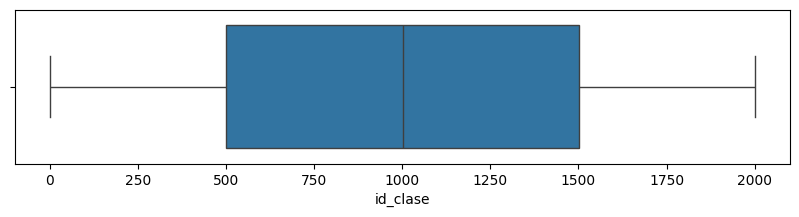

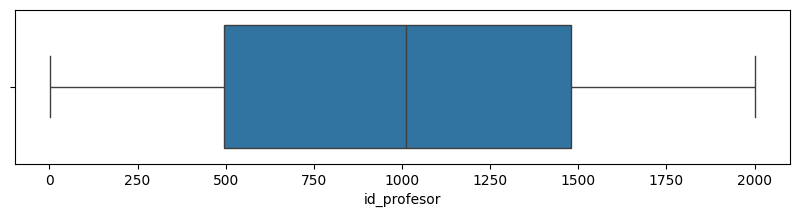

In [96]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')
    
cols=data.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data[cols], x=col)

OUTLIERS - Calculado

IRQ = Rango Intercuartirico

In [97]:
outliers={}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IRQ = Q3 - Q1
  LI = Q1 - 1.5 * IRQ
  LS = Q3 + 1.5 * IRQ
  outliers[col] = data[(data[col] < LI) | (data[col] > LS)][col]

  print(f'{col}: {len(outliers[col])} outliers')
print(outliers)

id_clase: 0 outliers
id_profesor: 0 outliers
{'id_clase': Series([], Name: id_clase, dtype: int64), 'id_profesor': Series([], Name: id_profesor, dtype: float64)}


In [98]:
data.mean
data.std

<bound method DataFrame.std of       id_clase    nombre_clase        horario_clase  id_profesor
0            1         Eveniet  2025-09-18 13:22:09        377.0
1            2           Eaque                  NaN        400.0
2            3          Quidem  2025-05-28 11:04:39        512.0
3            4            Vero  2024-10-23 17:02:45        975.0
4            5         Maiores  2024-10-04 06:19:08        435.0
...        ...             ...                  ...          ...
1995      1996            Quam  2025-04-11 12:19:28       1356.0
1996      1997            Enim  2025-01-25 02:57:43       1082.0
1997      1998            Esse  2025-02-25 10:23:17       1998.0
1998      1999              Et  2025-02-22 06:52:53        352.0
1999      2000  Exercitationem  2024-11-20 18:30:19       1233.0

[1999 rows x 4 columns]>

<Axes: xlabel='id_profesor', ylabel='Count'>

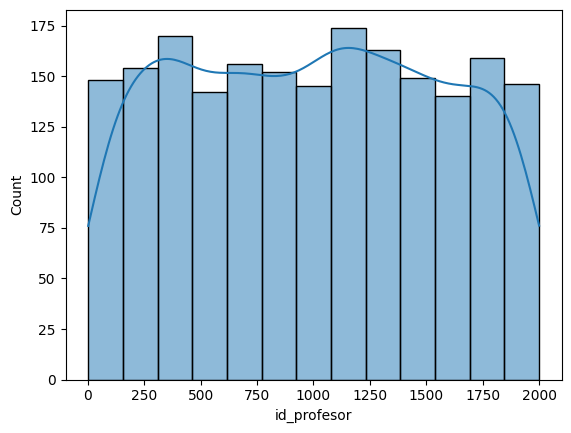

In [99]:
sns.histplot(data=data, x='id_profesor', kde=True)

In [100]:
# data.isna().sum()
# isna, traer valores nulos
data.isna().mean()*100

id_clase         0.000000
nombre_clase     0.000000
horario_clase    9.854927
id_profesor      0.050025
dtype: float64

Eliminar valores nulos

In [101]:
#axis   1 columna,  0 fila
#data.drop('id_profesor', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_clase       1999 non-null   int64  
 1   nombre_clase   1999 non-null   object 
 2   horario_clase  1802 non-null   object 
 3   id_profesor    1998 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.1+ KB


Imputar datos

Datos sin la variable objetivo

In [102]:
data_sin_y = data.drop('horario_clase', axis=1)
data_sin_y.head()

,id_clase,nombre_clase,id_profesor
0,1,Eveniet,377.0
1,2,Eaque,400.0
2,3,Quidem,512.0
3,4,Vero,975.0
4,5,Maiores,435.0


In [103]:
# Correlacion con la variable objetivo
num_cols = data.select_dtypes(include='number').columns
correlacion_completo = data[num_cols].corr()

In [104]:
# Correlacion sin la variable objetivo
num_cols_sin_y = data_sin_y.select_dtypes(include='number').columns
correlacion_sin_y = data_sin_y[num_cols_sin_y].corr()

Text(0.5, 1.0, 'Matriz de Correlación - Dataset Completo')

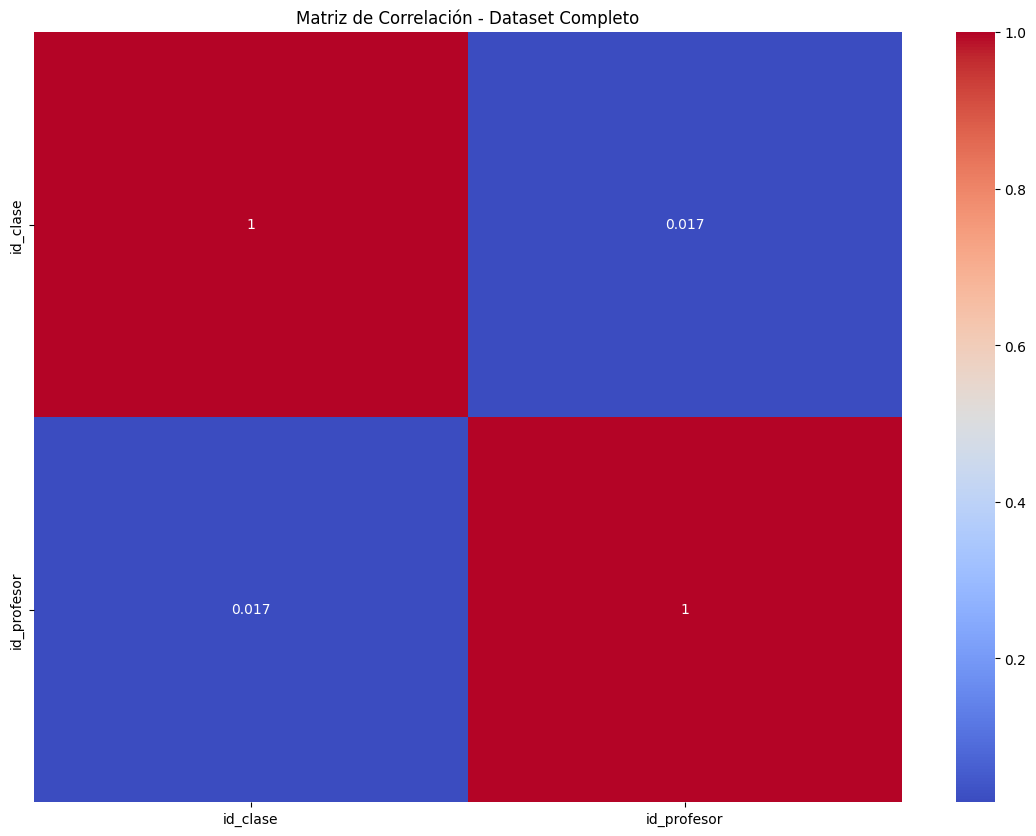

In [105]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion_completo, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Dataset Completo')

LA TABLA CLASE NO CUENTA CON CAMPOS NUMERICOS, SOLO LOS ID